In [121]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable


class LinearControlSystem:

    def __init__(
        self,
        input_parameters: dict,
        u: Callable,
        time: float

    ):
        self.u = u
        self.time = time
        m1, d1, k1, m2, d2, k2 = input_parameters.values()
        self.A = np.array([
            [0, -(k2 + k1) / m1, 0, k2 / m1],
            [1, -(d2 + d1) / m1, 0, d2 / m1],
            [0, k2 / m2, 0, -k2 / m2],
            [0, d2 / m2, 1, -d2 / m2]
        ])
        self.B = np.array([k1 / m1, d1 / m1, 0, 0]).reshape(-1, 1)

    def compute_eigenvalues(self):

        eigenvalues, eigenvectors = np.linalg.eig(self.A)

        return print("Eigenvalues:", eigenvalues)


    def solve(self, initial_conditions: dict, step_size: float = 0.1):

        self.x_values = []
        x = np.array(list(initial_conditions.values())).reshape(-1, 1)
        self.time_steps =  np.linspace(0, self.time, int(self.time / step_size))

        for t in self.time_steps:
            # Append the current state to the x_values
            self.x_values.append(x.flatten())  # flatten to convert it to a 1D list for plotting
            # Compute the derivative of the state (dx)
            dx = self.A @ x + self.B * u(t)
            # Update the state using Euler method
            x = x + dx * step_size

    def plot(self):

        self.x_values = np.array(self.x_values)
        plt.figure(figsize=(10, 6))

        # Plot all state variables
        plt.plot(self.time_steps, self.x_values[:, 1], label="y1 (Velocity of mass 1)")
        plt.plot(self.time_steps, self.x_values[:, 3], label="y2 (Velocity of mass 2)")

        # Labels and title
        plt.xlabel("Time (s)")
        plt.ylabel("State Variables")
        plt.title("State Variables of the Linear Control System (Euler Method)")
        plt.legend()
        plt.grid(True)

        # Show the plot
        plt.show()


Assignment 3

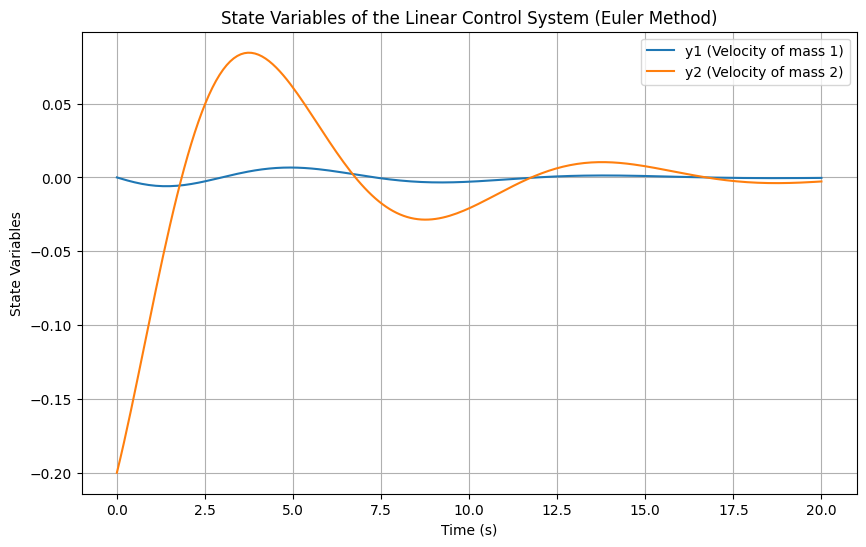

Eigenvalues: [-0.40399063+0.80297748j -0.40399063-0.80297748j -0.22100937+0.62703556j
 -0.22100937-0.62703556j]


In [122]:
u = lambda t: 0
input_parameters = {"m1":1400, "d1": 1000, "k1": 1000,
                    "m2": 100, "d2": 50, "k2": 50}


initial_conditions = {"x1": 0, "x2": 0, "x3": 0, "x4": -0.2} 
model = LinearControlSystem(input_parameters, u=0, time=20)
model.solve(initial_conditions)
model.plot()
model.compute_eigenvalues()


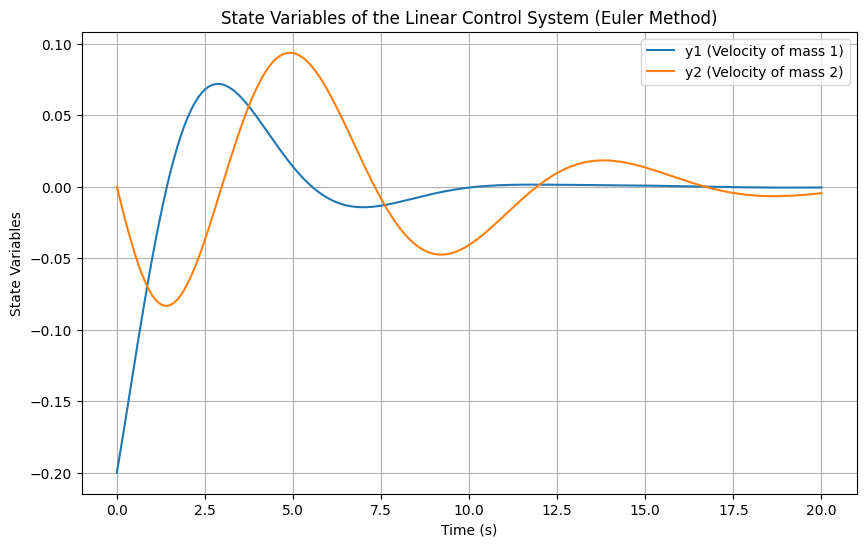

Eigenvalues: [-0.40399063+0.80297748j -0.40399063-0.80297748j -0.22100937+0.62703556j
 -0.22100937-0.62703556j]


In [123]:
initial_conditions = {"x1": 0, "x2": -0.2, "x3": 0, "x4": 0} 
model = LinearControlSystem(input_parameters, u=0, time=20)
model.solve(initial_conditions)
model.plot()
model.compute_eigenvalues()

Assignment 4

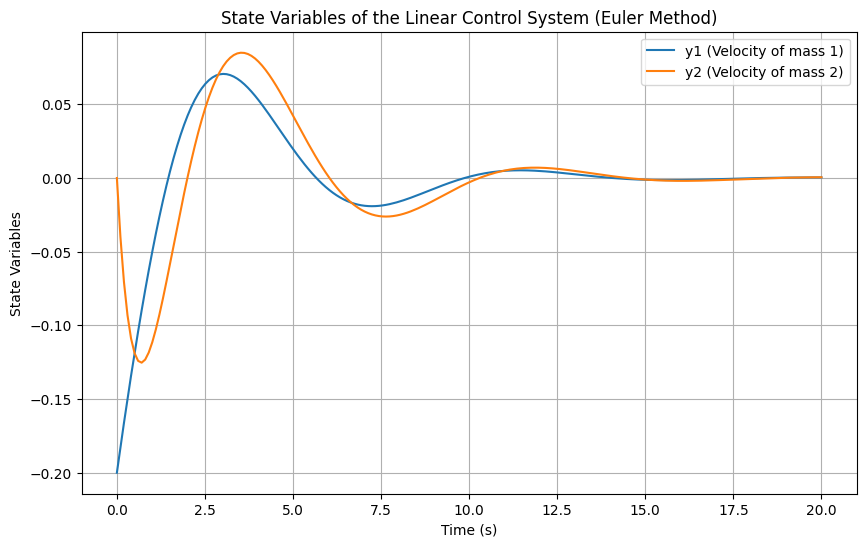

Eigenvalues: [-0.33217084+0.72645271j -0.33217084-0.72645271j -1.38388755+0.j
 -0.80891364+0.j        ]


In [124]:
u = lambda t: 0
input_parameters = {"m1":1400, "d1": 1000, "k1": 1000,
                    "m2": 100, "d2": 200, "k2": 100}


initial_conditions = {"x1": 0, "x2": -0.2, "x3": 0, "x4": 0} 
model = LinearControlSystem(input_parameters, u=0, time=20)
model.solve(initial_conditions)
model.plot()
model.compute_eigenvalues()

Assignment 5

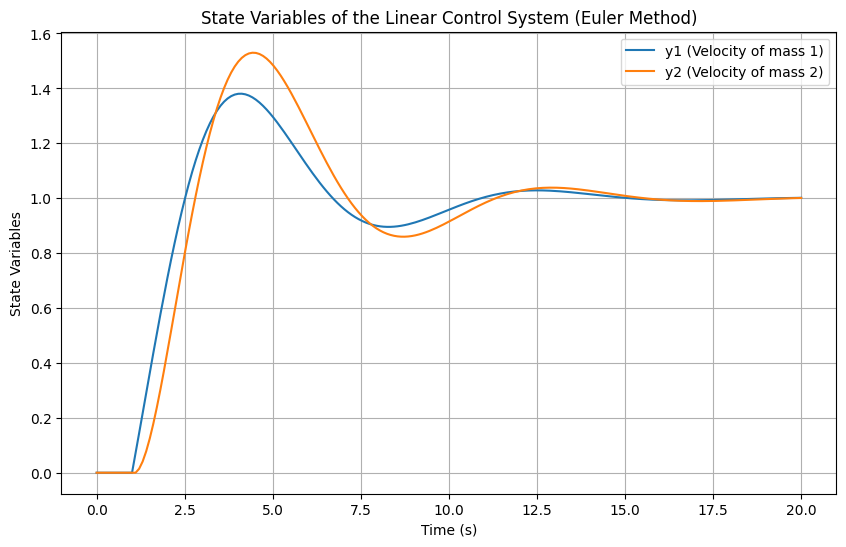

Eigenvalues: [-0.33217084+0.72645271j -0.33217084-0.72645271j -1.38388755+0.j
 -0.80891364+0.j        ]


In [125]:
u = lambda t: 0 if t<1 else 1
input_parameters = {"m1":1400, "d1": 1000, "k1": 1000,
                    "m2": 100, "d2": 200, "k2": 100}


initial_conditions = {"x1": 0, "x2": 0, "x3": 0, "x4": 0} 
model = LinearControlSystem(input_parameters, u=0, time=20)
model.solve(initial_conditions)
model.plot()
model.compute_eigenvalues()